In [1]:
import json
with open("../data/train_social_att_sup.json",'r',encoding='utf-8')as f:
    train_data=json.load(f)
    train_data = train_data[:]
with open("../data/dev_social_att_sup.json",'r',encoding='utf-8')as f:
    eval_data=json.load(f)
    eval_data = eval_data[:]

In [2]:
def read_data(dataset):
    sentence1=[]
    sentence2=[]
    label=[]
    idx=[]
    for text in dataset:
        sentence1.append(text[0])
        sentence2.append(text[1])
        label.append(text[2])
        #idx.append(text['idx'])
    return sentence1,sentence2,label

In [3]:
ori_train_sen1,ori_train_sen2,ori_trainlabel=read_data(train_data)
eval_sen1,eval_sen2,evallabel=read_data(eval_data)

In [4]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [5]:
from transformers import AutoTokenizer, AutoModelForMaskedLM, BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-chinese")

In [6]:
import transformers
transformers.logging.set_verbosity_error()

In [7]:
from torch.utils import data
import torch
def add_targets(encodings,label):
    encodings.update({'label':label})

class Dataset(torch.utils.data.Dataset):
  def __init__(self, encodings):
    self.encodings = encodings

  def __getitem__(self, idx):
    return {key: torch.tensor(eval[idx]) for key, eval in self.encodings.items()}

  def __len__(self):
    return len(self.encodings.input_ids)

In [8]:
def eval_model(model, sen1, sen2):
  input_encodings = tokenizer([sen1], [sen2], padding='max_length', truncation=True)
  input_dataset = Dataset(input_encodings)
  data_collator = default_data_collator
  input_dataloader = DataLoader(input_dataset, collate_fn=data_collator, batch_size=1)

  accelerator = Accelerator()
  model, input_dataloader = accelerator.prepare(model, input_dataloader)

  for batch in input_dataloader:
    outputs = model(**batch)
    predicted = outputs.logits.argmax(dim=-1)
  return predicted

In [9]:
eval_encodings = tokenizer(eval_sen1, eval_sen2, truncation=True, padding=True)
add_targets(eval_encodings,evallabel)
eval_dataset = Dataset(eval_encodings)

2023-09-19 05:34:38,022 [INFO] Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2023-09-19 05:34:38,022 [INFO] NumExpr defaulting to 8 threads.


model amout:  2
train epochs:  1


2023-09-19 05:34:39,625 [INFO] ***** Running training *****
2023-09-19 05:34:39,625 [INFO]   Num examples = 100
2023-09-19 05:34:39,626 [INFO]   Num Epochs = 1
2023-09-19 05:34:39,626 [INFO]   Instantaneous batch size per device = 8
2023-09-19 05:34:39,627 [INFO]   Gradient Accumulation steps = 1


=====================================model:0=====================================


/user_data/miniconda3/envs/model_training/lib/python3.8/site-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
2023-09-19 05:34:40,766 [INFO] Distributed environment: NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cuda

Mixed precision type: no

2023-09-19 05:34:40,766 [INFO]   Total train batch size (w. parallel, distributed & accumulation) = 8
2023-09-19 05:34:40,767 [INFO]   Total optimization steps = 13


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Iteration:   0%|          | 0/13 [00:00<?, ?it/s]

2023-09-19 05:34:46,470 [INFO] ***** Running eval *****
/tmp/ipykernel_2024/4046191714.py:127: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")


eval Iteration:   0%|          | 0/25 [00:00<?, ?it/s]

2023-09-19 05:34:49,596 [INFO] epoch 0: {'accuracy': 0.63}


model:  0
eval accuracy:  0.63


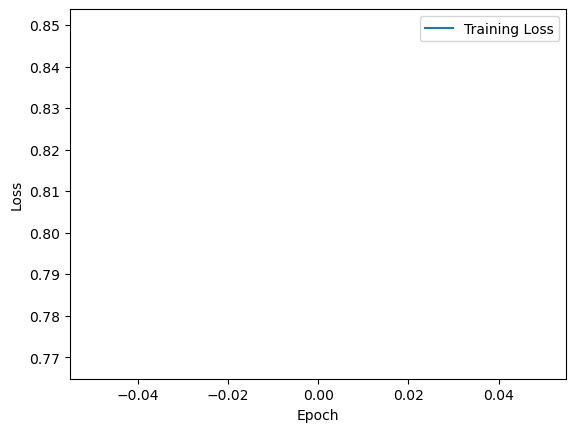

Loss:  [0.8093135841190815]
error:  0.32
train accuracy:  0.68
alpha:  0.37688590118819
[0.6859943405700354, 0.6859943405700354, 0.6859943405700354, 0.6859943405700354, 1.457737973711325, 0.6859943405700354]
[0.6859943405700354, 0.6859943405700354, 1.457737973711325, 0.6859943405700354, 0.6859943405700354, 1.457737973711325]
=====================================model:1=====================================


/user_data/miniconda3/envs/model_training/lib/python3.8/site-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
2023-09-19 05:34:54,093 [INFO] Distributed environment: NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cuda

Mixed precision type: no

2023-09-19 05:34:54,094 [INFO]   Total train batch size (w. parallel, distributed & accumulation) = 8
2023-09-19 05:34:54,094 [INFO]   Total optimization steps = 13


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Iteration:   0%|          | 0/13 [00:00<?, ?it/s]

2023-09-19 05:34:59,643 [INFO] ***** Running eval *****


eval Iteration:   0%|          | 0/25 [00:00<?, ?it/s]

2023-09-19 05:35:02,766 [INFO] epoch 0: {'accuracy': 0.62}


model:  1
eval accuracy:  0.62


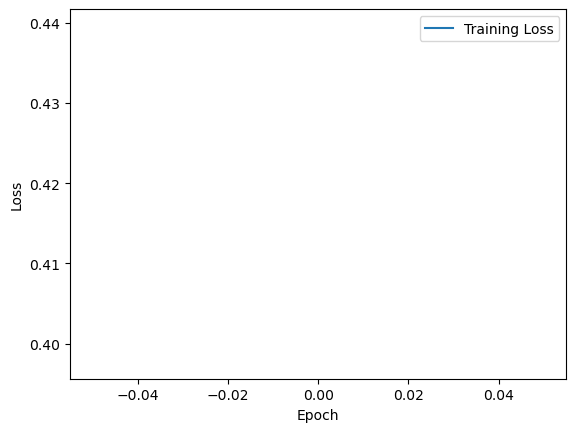

Loss:  [0.41866827156098696]
error:  0.5193014705882352
train accuracy:  0.62
alpha:  -0.038622133540758795
[0.7130071948625536, 0.6600048901117092, 0.7130071948625536, 0.7130071948625536, 1.4025103914873818, 0.6600048901117092]
[0.7130071948625536, 0.7130071948625536, 1.4025103914873818, 0.6600048901117092, 0.7130071948625536, 1.5151402890829262]


In [10]:
import numpy as np
import math
import logging
import json
import matplotlib.pyplot as plt

from datasets import load_metric
from torch.utils.data import DataLoader
from tqdm.auto import tqdm, trange
from transformers import (
    AdamW,
    default_data_collator,
    get_scheduler,
    BertConfig,
    BertForSequenceClassification
)
from accelerate import Accelerator

alpha_list = [] 
all_epoch = []  # List to store epoch accuracy results
best_epoch = {'epoch': -1, 'acc': 0.0}  # Dictionary to store the best epoch
train_batch_size = 8     
eval_batch_size = 4      
num_train_epochs = 2    
data_collator = default_data_collator
learning_rate=3e-5          
gradient_accumulation_steps = 1   
no_decay = ["bias", "LayerNorm.weight"]
model_amount = 5 
output_dir = '../model/'+"md"+str(model_amount)+"-ep"+ str(num_train_epochs) + '/'
alpha_list_path = output_dir + "alpha.json"
error_pred_list = []


print("model amout: ", model_amount)
print("train epochs: ", num_train_epochs)
weight=torch.tensor(np.ones(len(train_data)), device=device) 

train_sen1, train_sen2, trainlabel = read_data(train_data)
train_encodings = tokenizer(train_sen1, train_sen2, truncation=True, padding=True)
add_targets(train_encodings, trainlabel)
train_dataset = Dataset(train_encodings)

logger = logging.getLogger(__name__)
logger.info("***** Running training *****")
logger.info(f"  Num examples = {len(train_dataset)}")
logger.info(f"  Num Epochs = {num_train_epochs}")
logger.info(f"  Instantaneous batch size per device = {train_batch_size}")
logger.info(f"  Gradient Accumulation steps = {gradient_accumulation_steps}")
for count_epoch in range(model_amount):
    print(f"=====================================model:{count_epoch}=====================================")
    
    train_dataloader = DataLoader(train_dataset, shuffle=True, collate_fn=data_collator, batch_size=train_batch_size)
    eval_dataloader = DataLoader(eval_dataset, collate_fn=data_collator, batch_size=eval_batch_size)

    config = BertConfig.from_pretrained('bert-base-chinese', num_labels=2)
    model = BertForSequenceClassification.from_pretrained("bert-base-chinese", config=config)
    
    # Initialize optimizer and scheduler
    optimizer_grouped_parameters = [
        {
            "params": [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)],
            "weight_decay": 0.0,
        },
        {
            "params": [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)],
            "weight_decay": 0.0,
        },
    ]
    optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate)
    num_update_steps_per_epoch = math.ceil(len(train_dataloader) / gradient_accumulation_steps)
    max_train_steps = num_train_epochs * num_update_steps_per_epoch
    lr_scheduler = get_scheduler(
        name="linear",
        optimizer=optimizer,
        num_warmup_steps=0,
        num_training_steps=max_train_steps,
    )

    accelerator = Accelerator()
    model, optimizer, train_dataloader = accelerator.prepare(
        model, optimizer, train_dataloader
    )
    total_batch_size = train_batch_size * accelerator.num_processes * gradient_accumulation_steps

    logger = logging.getLogger(__name__)
    logging.basicConfig(
        format="%(asctime)s - %(levelname)s - %(name)s - %(message)s",
        datefmt="%m/%d/%Y %H:%M:%S",
        level=logging.INFO,
    )
    logger.info(accelerator.state)
    logger.info(f"  Total train batch size (w. parallel, distributed & accumulation) = {total_batch_size}")
    logger.info(f"  Total optimization steps = {max_train_steps}")

    completed_steps = 0
    total_loss_list = []
    for epoch in trange(num_train_epochs, desc="Epoch"):
        sub_weight_loc = 0 
        total_loss = 0
        model.train()
        for step, batch in enumerate(tqdm(train_dataloader, desc="Iteration")):
            inputs = {k: v.to(device) for k, v in batch.items()}
            logits = model(**inputs).logits 
            labels = inputs["labels"]
            sub_weight = weight[sub_weight_loc : sub_weight_loc+len(batch)]
            e_x = torch.exp(logits - torch.max(logits, dim=1, keepdim=True).values)
            softmax_preds = e_x / e_x.sum(dim=1, keepdim=True)
            unweighted_loss = -torch.log(softmax_preds.gather(1, labels.view(-1, 1)))
            loss = (unweighted_loss* sub_weight.clone().detach()).mean()
            sub_weight_loc += len(batch)
            accelerator.backward(loss)
            total_loss+=loss
            optimizer.step()
            lr_scheduler.step()
            optimizer.zero_grad()
            completed_steps += 1
            if step % 100 == 0:
                total_loss_list.append(total_loss.item())
                total_loss = 0
            if completed_steps >= max_train_steps:
                break

        # Evaluation
        logger.info("***** Running eval *****")
        model.eval()
        metric = load_metric("accuracy")
        with torch.no_grad():
            for step, batch in enumerate(tqdm(eval_dataloader, desc="eval Iteration")):
                inputs = {k: v.to(device) for k, v in batch.items()}  
                outputs = model(**inputs)
                predictions = outputs.logits.argmax(dim=-1)
                metric.add_batch(
                    predictions=accelerator.gather(predictions),
                    references=accelerator.gather(batch["labels"]),
                )

        eval_metric = metric.compute()
        print("model: ",str(count_epoch))
        logger.info(f"epoch {epoch}: {eval_metric}")
        print("eval accuracy: ", eval_metric['accuracy'])
        all_epoch.append([epoch, eval_metric['accuracy']])
        if eval_metric['accuracy'] > best_epoch['acc']:
            best_epoch.update({"epoch": epoch, "acc": eval_metric['accuracy']})

        accelerator.wait_for_everyone()
        unwrapped_model = accelerator.unwrap_model(model)
        unwrapped_model.save_pretrained(output_dir + 'epoch_' + str(count_epoch) , save_function=accelerator.save)
    plt.plot(total_loss_list, label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    print("Loss: ", total_loss_list)
    cnt = len(train_data)
    error = 0
    errorcnt = 0
    weight_change_loc = np.array([]) 
    for i in range(cnt):
        sen1 = ori_train_sen1[i]
        sen2 = ori_train_sen2[i]
        predict = eval_model(model, sen1, sen2)  # Need to define eval_model() correctly

        if predict.item() != ori_trainlabel[i]:
            errorcnt += 1
            error += weight[i]
            weight_change_loc = np.append(weight_change_loc, i)
    error /= torch.sum(weight)
    alpha = 0.5 * (np.log((1 - np.array(error.cpu())) / np.array(error.cpu())))
    alpha_list.append(alpha)
    weight[weight_change_loc] *= math.e ** (alpha) 
    weight[np.setdiff1d(range(cnt), weight_change_loc)] *= math.e ** (-alpha) 
    accuracy = (cnt - errorcnt)/cnt
    print("error: ", error.item())
    print("train accuracy: ",accuracy)
    print("alpha: ",alpha)
    print(weight.tolist()[0:6])
    print(weight.tolist()[-7:-1])
    
with open(alpha_list_path, "w") as json_file:
    json.dump(alpha_list, json_file)

In [11]:
import numpy as np

with open(alpha_list_path, "r") as json_file:
    alpha_list = json_file.read()
    alpha_list = json.loads(alpha_list)

def adaboost_voting(model_amount, models, alpha, sen1, sen2):
    votes = 0
    for i in range(model_amount):
        model = models[i]
        model_vote = eval_model(model, sen1, sen2).item()
        if model_vote == 0:
            model_vote = -1
        votes += model_vote * alpha[i]
    final_vote = int(math.copysign(1, votes)) 
    if final_vote == -1:
        final_vote = 0
    return final_vote

In [12]:
from transformers import BertConfig, BertForSequenceClassification
models = [] #存多個模型
for i in range(model_amount):
    config = BertConfig.from_pretrained(f'{output_dir}epoch_{i}/config.json')
    model = BertForSequenceClassification.from_pretrained(f'{output_dir}epoch_{i}/pytorch_model.bin', config=config)
    models.append(model)

1. boosting result

In [13]:
import numpy as np
cnt=0
correct_arr=[]
errorcnt=0
ans = []
for i in tqdm(range(len(eval_data))):
    cnt+=1
    sen1=eval_sen1[i]
    sen2=eval_sen2[i]
    predict=adaboost_voting(model_amount, models,alpha_list,sen1,sen2)
    ans.append(predict)
    if predict!=evallabel[i]:
        correct_arr.append(0)
        errorcnt+=1
    else:
        correct_arr.append(1)

accuracy=(cnt-errorcnt)/cnt
error_rate = errorcnt/cnt

print("===============Adaboost final model===============")
print(f'cnt = {cnt},errorcnt = {errorcnt}')
print("accuracy: "+str(accuracy))
print()

  0%|          | 0/100 [00:00<?, ?it/s]

===============Adaboost final model===============
cnt = 100,errorcnt = 37
accuracy: 0.63



2. all models results

In [14]:
import numpy as np
for j in range(model_amount):
    cnt=0
    correct_arr=[]
    errorcnt=0
    model = models[j]
    for i in tqdm(range(len(eval_data))):
        cnt+=1
        sen1=eval_sen1[i]
        sen2=eval_sen2[i]
        predict=eval_model(model,sen1,sen2)
        if predict.item()!=evallabel[i]:
            correct_arr.append(0)
            errorcnt+=1
        else:
            correct_arr.append(1)
    accuracy=(cnt-errorcnt)/cnt
    error_rate = errorcnt/cnt
    # alpha=0.5*(np.log((1-error_rate)/error_rate))
    alpha = alpha_list[j]
    print("===============Each model===============")
    print(f"model {j}: ")
    print(f'cnt = {cnt},errorcnt = {errorcnt}')
    print("alpha: ",alpha_list[j])
    print("accuracy: "+str(accuracy))

  0%|          | 0/100 [00:00<?, ?it/s]

===============Each model===============
model 0: 
cnt = 100,errorcnt = 37
alpha:  0.37688590118819
accuracy: 0.63


  0%|          | 0/100 [00:00<?, ?it/s]

===============Each model===============
model 1: 
cnt = 100,errorcnt = 38
alpha:  -0.038622133540758795
accuracy: 0.62


In [15]:
from sklearn.metrics import classification_report
print("no support=0. support=1. attack=2")
print(classification_report(evallabel,ans))

no support=0. support=1. attack=2
              precision    recall  f1-score   support

           0       0.50      0.08      0.14        37
           1       0.64      0.95      0.76        63

    accuracy                           0.63       100
   macro avg       0.57      0.52      0.45       100
weighted avg       0.59      0.63      0.53       100

